# Bangalore House Price Prediction

## The main goal of this project is to find the price of the Bangalorer house using their features.

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Row Dataset

In [2]:
df = pd.read_csv('Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.shape

(13320, 9)

# Information about our Dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 624.4+ KB


In [5]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


# Pairplot of Our Dataset

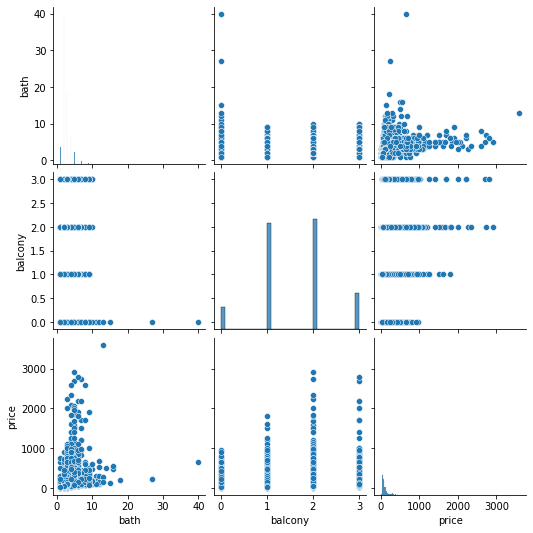

In [6]:
sns.pairplot(df)
plt.show()

# value count of each feature

In [7]:
def value_count(df):
    for var in df.columns:
        print(df[var].value_counts())

In [8]:
value_count(df)

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Jan               1
15-Dec               1
15-Jun               1
Name: availability, Length: 81, dtype: int64
Whitefield             540
Sarjapur  Road         399
Electronic City        302
Kanakpura Road         273
Thanisandra            234
                      ... 
Chowdeshwari Layout      1
Punappa Layout           1
Bandepalya               1
Mullur                   1
Okalipura                1
Name: location, Length: 1305, dtype: int64
2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedro

# Correlation heatmap

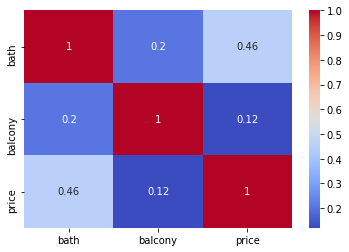

In [9]:
num_var = ["bath", "balcony", "price"]
sns.heatmap(df[num_var].corr(), cmap = "coolwarm", annot = True)
plt.show()

# Data cleaning :-

In [10]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [11]:
df.isnull().mean() * 100

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64

# visualize missing value using heatmap to get idea where is the value missing

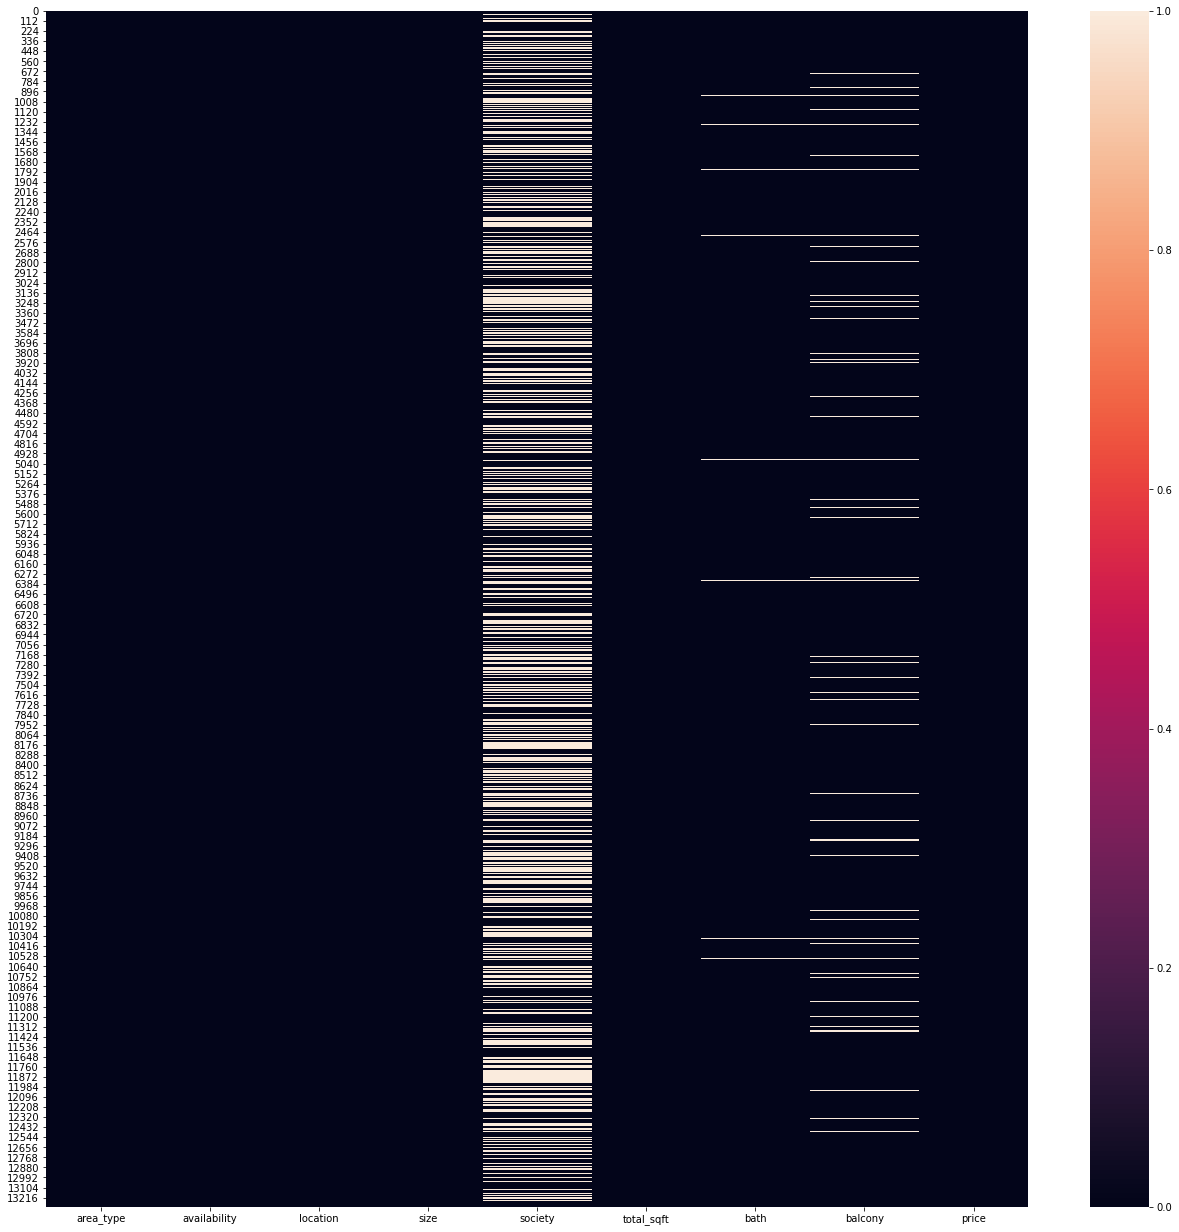

In [12]:
plt.figure(figsize=(22,22))
sns.heatmap(df.isnull())
plt.show()

In [13]:
# Drop ----------> society feature
# because 41.3% missing value

In [14]:
df2 = df.drop(['society'], axis=1)
df2.shape

(13320, 8)

In [15]:
# fill mean value in --------> balcony feature
# because it contain 4.5% missing value

In [16]:
df2['balcony'] = df2['balcony'].fillna(df2['balcony'].mean())
df2.isnull().sum()

area_type        0
availability     0
location         1
size            16
total_sqft       0
bath            73
balcony          0
price            0
dtype: int64

In [17]:
# drop na value rows from df2
# because there is very less % value missing

In [18]:
df3 = df2.dropna()
df3.shape

(13246, 8)

In [19]:
df3.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


# Feature Engineering

In [20]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [21]:
df3['total_sqft'].value_counts()

1200                 843
1100                 221
1500                 204
2400                 195
600                  180
1000                 172
1350                 132
1050                 123
1300                 117
1250                 114
900                  112
1400                 108
1800                 104
1150                 101
1600                 100
1140                  91
2000                  82
1450                  70
1650                  69
800                   67
3000                  66
1075                  66
1020                  63
2500                  62
1125                  60
1550                  60
1160                  60
950                   59
1700                  58
1180                  58
1260                  57
1255                  56
1220                  55
1080                  55
1070                  53
700                   52
750                   52
4000                  48
1225                  48
1175                  48


In [22]:
# best strategy is to convert it into number by spliting it

In [23]:
total_sqft_int = []
for str_value in df3['total_sqft']:
    try:
        total_sqft_int.append(float(str_value))
    except:
        try:
            temp = []
            temp = str_value.split('-')
            total_sqft_int.append((float(temp[0])+float(temp[-1]))/2)
        except:
            total_sqft_int.append(np.nan)

In [24]:
# Reset the index of dataframe

In [25]:
df4 = df3.reset_index(drop = True) # drop=True - don't add index column in df

In [26]:
df5 = df4.join(pd.DataFrame({'total_sqft_int':total_sqft_int}))
df5.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,1056.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,2600.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,1440.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,1521.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,1200.0


In [27]:
df5.isnull().sum()

area_type          0
availability       0
location           0
size               0
total_sqft         0
bath               0
balcony            0
price              0
total_sqft_int    46
dtype: int64

In [28]:
# Drop na value

In [29]:
df6 = df5.dropna()
df6.shape

(13200, 9)

In [30]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13200 entries, 0 to 13245
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area_type       13200 non-null  object 
 1   availability    13200 non-null  object 
 2   location        13200 non-null  object 
 3   size            13200 non-null  object 
 4   total_sqft      13200 non-null  object 
 5   bath            13200 non-null  float64
 6   balcony         13200 non-null  float64
 7   price           13200 non-null  float64
 8   total_sqft_int  13200 non-null  float64
dtypes: float64(4), object(5)
memory usage: 773.4+ KB


In [31]:
df6['size'].value_counts()

2 BHK         5192
3 BHK         4277
4 Bedroom      816
4 BHK          574
3 Bedroom      541
1 BHK          527
2 Bedroom      325
5 Bedroom      293
6 Bedroom      190
1 Bedroom      100
7 Bedroom       83
8 Bedroom       83
5 BHK           56
9 Bedroom       45
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            7
8 BHK            5
11 Bedroom       2
10 BHK           2
11 BHK           2
12 Bedroom       1
27 BHK           1
19 BHK           1
14 BHK           1
13 BHK           1
16 BHK           1
43 Bedroom       1
18 Bedroom       1
Name: size, dtype: int64

In [32]:
# size feature shows the number of rooms
 
"""
in  size feature we assume that 
2 BHK = 2 Bedroom == 2 RK
so takes only number and remove sufix text
"""

'\nin  size feature we assume that \n2 BHK = 2 Bedroom == 2 RK\nso takes only number and remove sufix text\n'

In [33]:
size_int = []
for str_val in df6['size']:
    temp = []
    temp = str_val.split(" ")
    try:
        size_int.append(int(temp[0]))
    except:
        size_int.append(np.nan)
        print(f"Noice = {str_val}")

In [34]:
df7 = df6.reset_index(drop = True)
df7.shape

(13200, 9)

In [35]:
df8 = df7.join(pd.DataFrame({'BHK':size_int}))
df8.shape

(13200, 10)

In [36]:
df8.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,BHK
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,1056.0,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,2600.0,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,1440.0,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,1521.0,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,1200.0,2


In [37]:
## Finding Outlier and Removing
 
# function to create histogram, Q-Q plot and boxplot
 
# for Q-Q plots

In [38]:
import scipy.stats as stats
def diag_plot(df, var):
    # Distplot
    plt.figure(figsize=(22,5))
    plt.subplot(1,3,1)
    sns.distplot(df[var], bins=30)
    plt.title('Histogram')
    
    #Q-Q Plot
    plt.subplot(1,3,2)
    stats.probplot(df[var], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')
    
    # Boxplot
    plt.subplot(1,3,3)
    sns.boxplot(y = df[var])
    plt.title('Boxplot')
    
    plt.show()

In [39]:
 # here we observe outlier using histogram,, qq plot and boxplot
 # here we consider  1 BHK requierd min 350 sqft are

-------bath------


c:\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


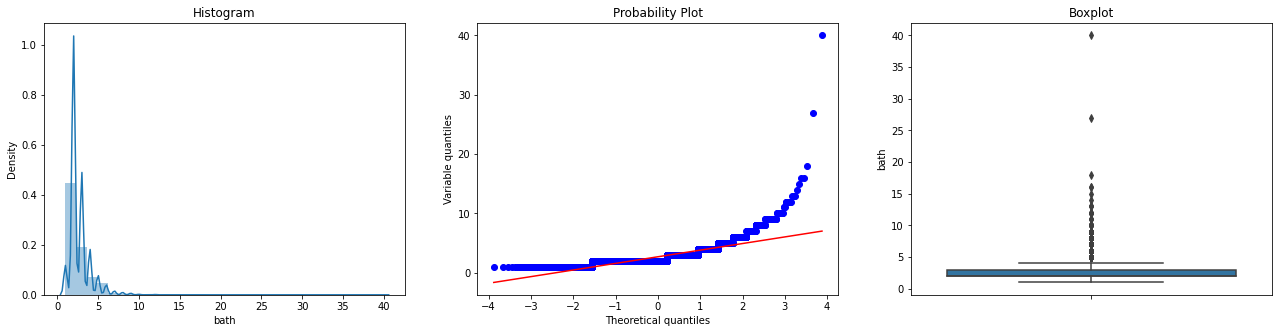

-------balcony------


c:\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


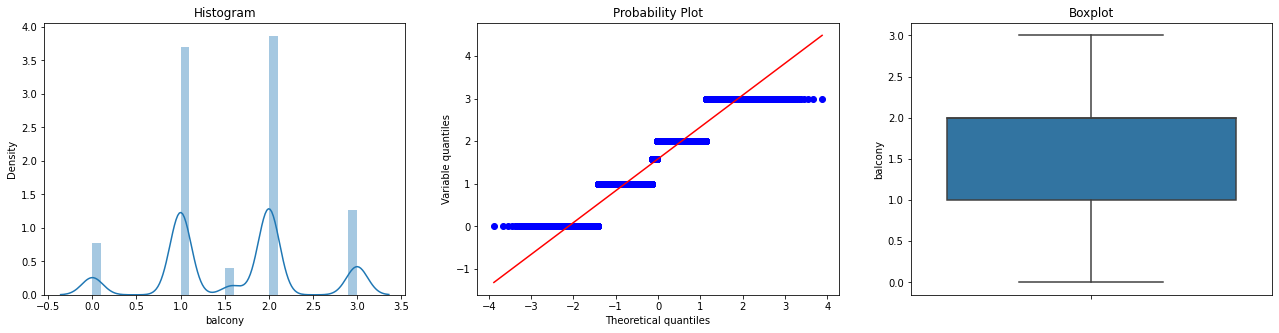

-------total_sqft_int------


c:\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


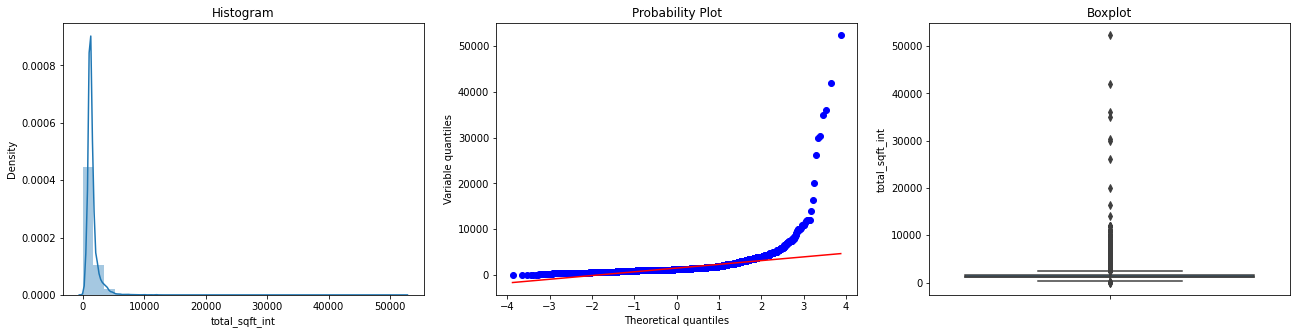

-------BHK------


c:\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


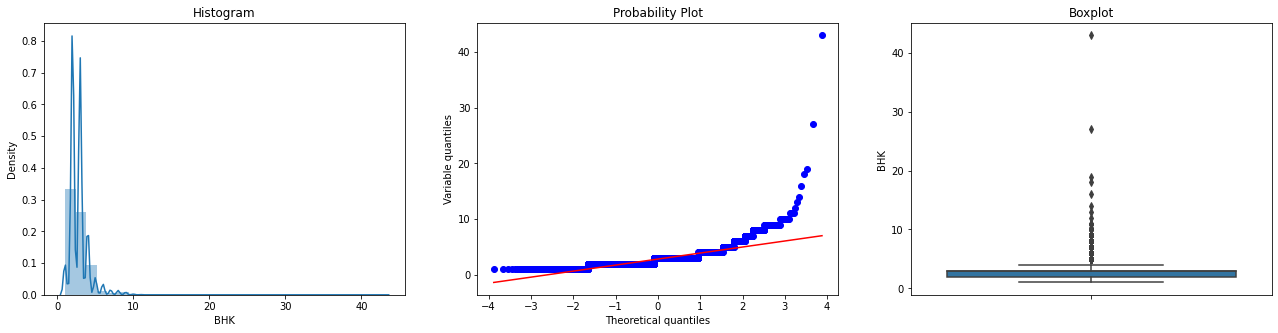

-------price------


c:\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


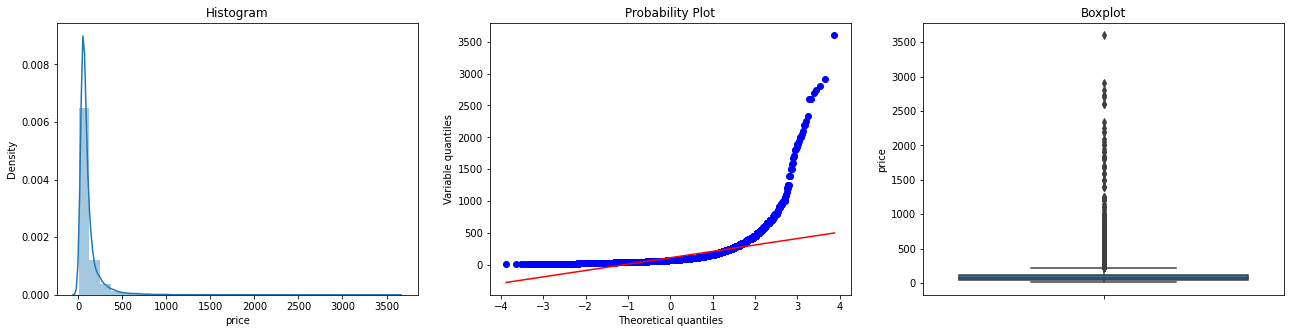

In [40]:
num_var = ["bath","balcony","total_sqft_int","BHK","price"]
for var in num_var:
    print(f"-------{var}------")
    diag_plot(df8, var)

In [41]:
# if 1 BHK total_sqft are < 350 then we ae going to remove them

In [42]:
df8[df8['total_sqft_int'] / df8['BHK'] < 350].head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,BHK
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,1020,6.0,1.584376,370.0,1020.0,6
26,Super built-up Area,Ready To Move,Electronic City,2 BHK,660,1.0,1.000000,23.1,660.0,2
29,Super built-up Area,Ready To Move,Electronic City,3 BHK,1025,2.0,1.000000,47.0,1025.0,3
45,Plot Area,Ready To Move,HSR Layout,8 Bedroom,600,9.0,1.584376,200.0,600.0,8
57,Plot Area,Ready To Move,Murugeshpalya,6 Bedroom,1407,4.0,1.000000,150.0,1407.0,6


In [43]:
df9 = df8[~(df8['total_sqft_int'] / df8['BHK'] < 350)]
df9.shape

(12106, 10)

In [44]:
# create new feature that is price per squre foot 
# it help to find the outliers
 
#price in lakh so conver into rupee and then / by total_sqft_int

In [45]:
df9['Price_perSqrt'] = df8['price'] * 100000 / df9['total_sqft_int']
df9.head()

<ipython-input-45-dc5d0a5ad3e9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df9['Price_perSqrt'] = df8['price'] * 100000 / df9['total_sqft_int']


,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,BHK,Price_perSqrt
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,1056.0,2,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,2600.0,4,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,1440.0,3,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,1521.0,3,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,1200.0,2,4250.000000


In [46]:
df9.Price_perSqrt.describe()

count     12106.000000
mean       6184.466889
std        4019.983503
min         267.829813
25%        4200.030048
50%        5261.108523
75%        6800.000000
max      176470.588235
Name: Price_perSqrt, dtype: float64

In [47]:
#here we can see huge difference between min and max price_per_sqft
# min 6308.502826 max 176470.588235
 
# Removing outliers using help of 'price per sqrt'  taking std and mean per location

In [48]:
def rm_price_outl(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.Price_perSqrt)
        st = np.std(subdf.Price_perSqrt)
        reduce_df = subdf[(subdf.Price_perSqrt > (m-st)) & (subdf.Price_perSqrt <= (m+st))]
        df_out = pd.concat([df_out, reduce_df], ignore_index = True)
    return df_out

df10 = rm_price_outl(df9)
df10.shape

(8888, 11)

In [49]:
def scatter_plot(df, location):
    _2bhk = df[(df.location == location) & (df.BHK == 2)]
    _3bhk = df[(df.location == location) & (df.BHK == 3)]
    plt.figure(figsize=(22,8))
    plt.scatter(_2bhk.total_sqft_int, _2bhk.price, color='Blue', label='2 BHK', s=50)
    plt.scatter(_3bhk.total_sqft_int, _3bhk.price, color='Red', label='3 BHK', s=50, marker="+")
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()

In [50]:
# in below scatterplot we observe that at same location price of
# 2 bhk house is greater than 3 bhk so it is outlier

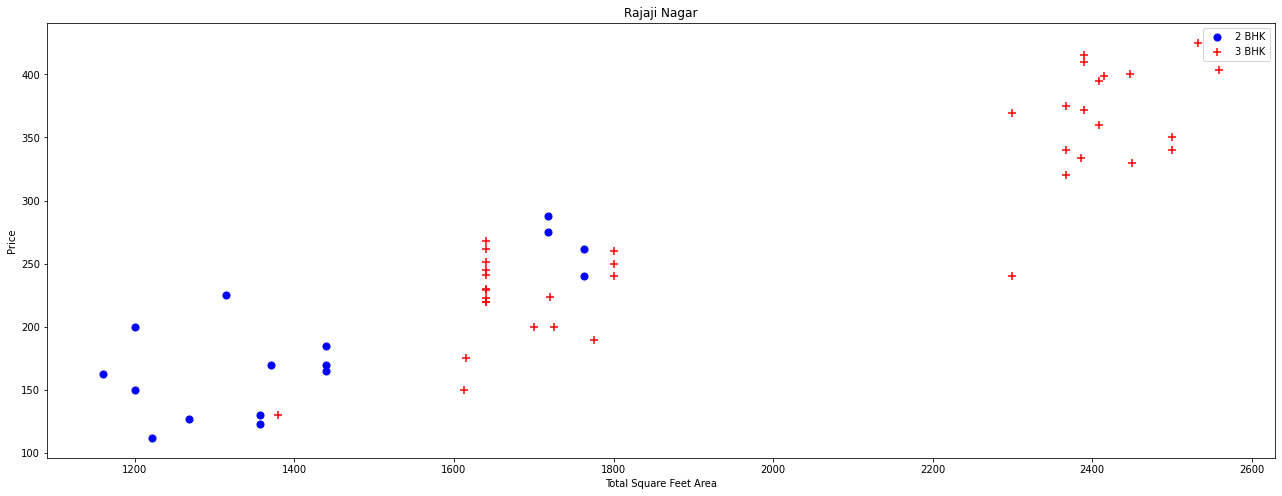

In [51]:
scatter_plot(df10, 'Rajaji Nagar')

In [52]:
# in below scatterplot we observe that at same location price of
# 3 bhk house is less than 2 bhk so it is outlier

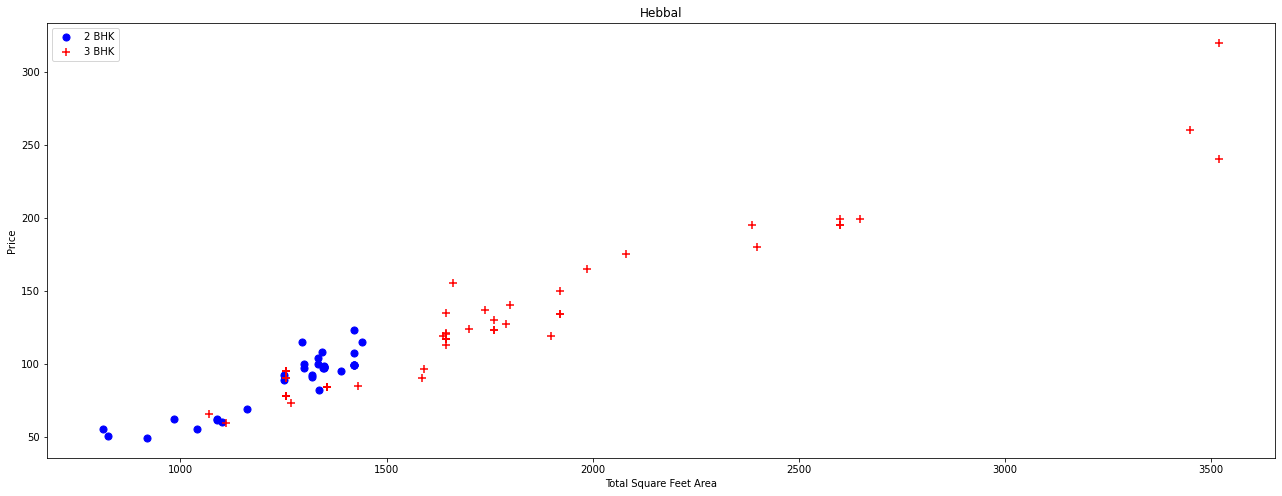

In [53]:
scatter_plot(df10, 'Hebbal')

In [54]:
# Removing BHK outliers

In [55]:
# Removing BHK outliers
def remove_bhk_outliers(df, location):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk]={
                'mean':np.mean(bhk_df.Price_perSqrt),
                'std':np.std(bhk_df.Price_perSqrt),
                'count':bhk_df.shape[0]}
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.Price_perSqrt<(stats['mean'])].index.values)
    return df.drop(exclude_indices, axis='index')
df11 = remove_bhk_outliers(df10, 'Hebbal')
df11.shape

(7194, 11)

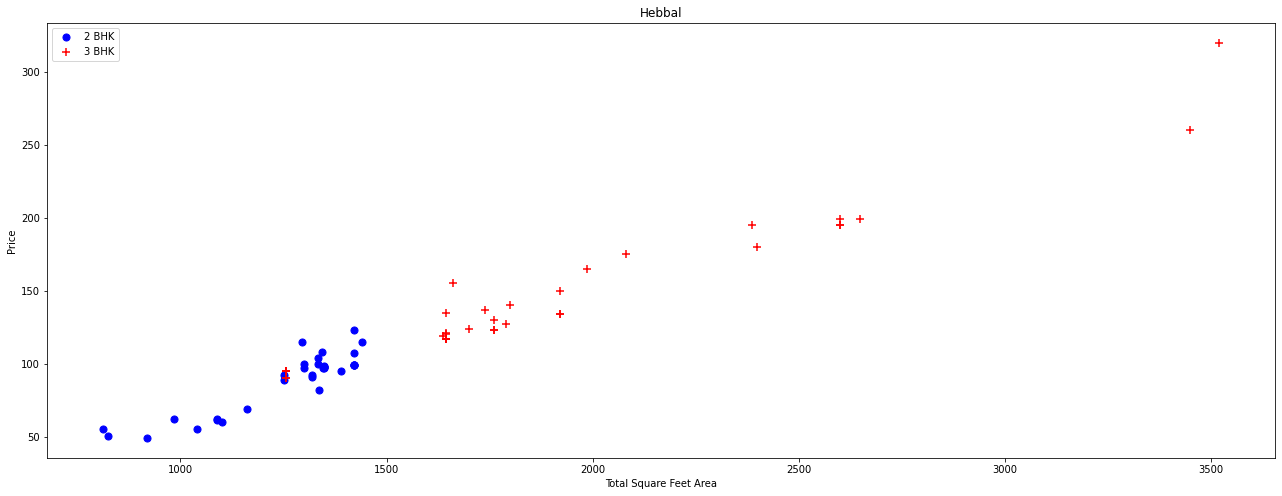

In [56]:
scatter_plot(df11, "Hebbal")

In [57]:
"""### Remove outliers using the help of 'bath' feature"""

"### Remove outliers using the help of 'bath' feature"

In [58]:
df11.bath.unique()

array([ 3.,  2.,  1.,  4.,  5.,  8.,  9.,  6.,  7., 12.])

In [59]:
df11[df11.bath > df11.BHK + 2]

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,BHK,Price_perSqrt
1861,Built-up Area,Ready To Move,Chikkabanavar,4 Bedroom,2460,7.0,2.000000,80.0,2460.0,4,3252.032520
5836,Built-up Area,Ready To Move,Nagasandra,4 Bedroom,7000,8.0,1.584376,450.0,7000.0,4,6428.571429
7098,Super built-up Area,Ready To Move,Sathya Sai Layout,6 BHK,11338,9.0,1.000000,1000.0,11338.0,6,8819.897689
7569,Super built-up Area,Ready To Move,Thanisandra,3 BHK,1806,6.0,2.000000,116.0,1806.0,3,6423.034330


In [60]:
df12 = df11[df11.bath < df11.BHK + 2]
df12.shape

(7120, 11)

c:\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning

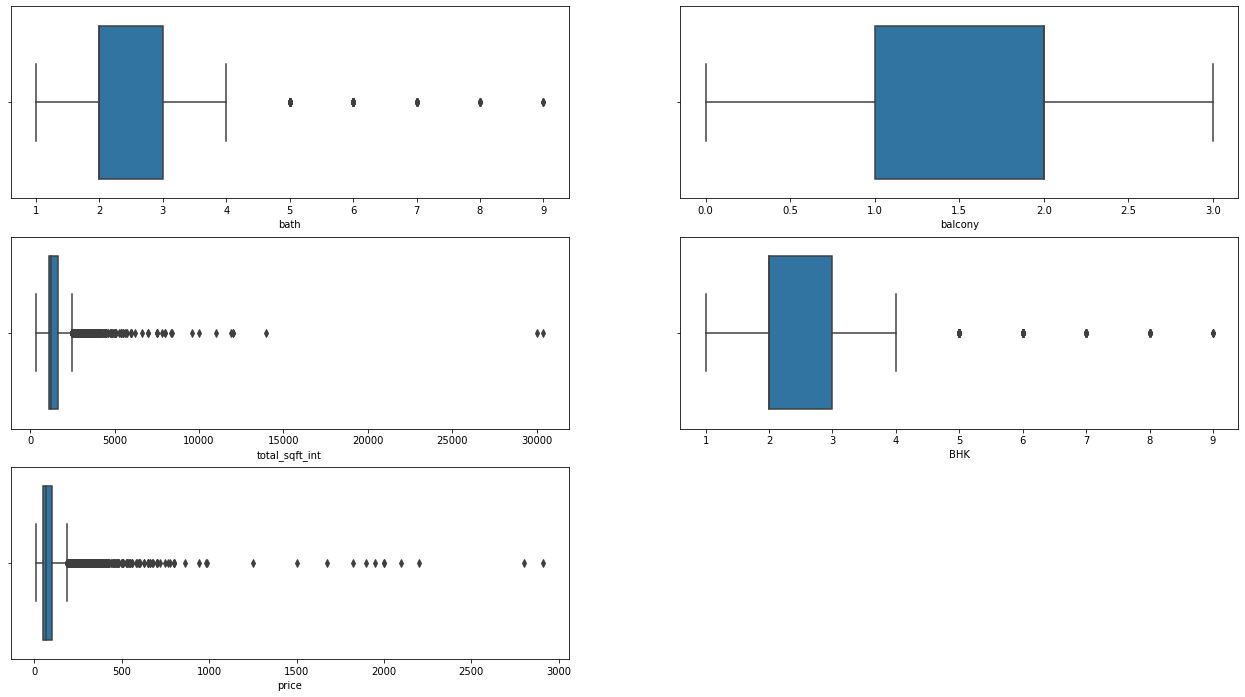

In [61]:
plt.figure(figsize=(22,12))
for i,var in enumerate(num_var):
    plt.subplot(3,2,i+1)
    sns.boxplot(df12[var])

In [62]:
df12.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,BHK,Price_perSqrt
0,Super built-up Area,Ready To Move,Devarabeesana Halli,3 BHK,1672,3.0,2.0,150.0,1672.0,3,8971.291866
1,Built-up Area,Ready To Move,Devarabeesana Halli,3 BHK,1750,3.0,3.0,149.0,1750.0,3,8514.285714
2,Super built-up Area,Ready To Move,Devarabeesana Halli,3 BHK,1750,3.0,2.0,150.0,1750.0,3,8571.428571
4,Super built-up Area,Ready To Move,Devarachikkanahalli,2 BHK,1250,2.0,2.0,40.0,1250.0,2,3200.000000
5,Plot Area,Ready To Move,Devarachikkanahalli,2 Bedroom,1200,2.0,2.0,83.0,1200.0,2,6916.666667


In [63]:
df13 = df12.drop(["size","total_sqft"], axis =1)
df13.head()

,area_type,availability,location,bath,balcony,price,total_sqft_int,BHK,Price_perSqrt
0,Super built-up Area,Ready To Move,Devarabeesana Halli,3.0,2.0,150.0,1672.0,3,8971.291866
1,Built-up Area,Ready To Move,Devarabeesana Halli,3.0,3.0,149.0,1750.0,3,8514.285714
2,Super built-up Area,Ready To Move,Devarabeesana Halli,3.0,2.0,150.0,1750.0,3,8571.428571
4,Super built-up Area,Ready To Move,Devarachikkanahalli,2.0,2.0,40.0,1250.0,2,3200.000000
5,Plot Area,Ready To Move,Devarachikkanahalli,2.0,2.0,83.0,1200.0,2,6916.666667


In [64]:
## Working on <<<<<< area_type >>>>> feature

In [65]:
df13['area_type'].value_counts()

Super built-up  Area    5345
Built-up  Area          1298
Plot  Area               441
Carpet  Area              36
Name: area_type, dtype: int64

In [66]:
for cat_var in ["Super built-up  Area","Built-up  Area","Plot  Area"]:
    df13["area_type"+cat_var] = np.where(df13['area_type'] == cat_var, 1,0)
df13.shape

(7120, 12)

In [67]:
df13.head()

,area_type,availability,location,bath,balcony,price,total_sqft_int,BHK,Price_perSqrt,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area
0,Super built-up Area,Ready To Move,Devarabeesana Halli,3.0,2.0,150.0,1672.0,3,8971.291866,1,0,0
1,Built-up Area,Ready To Move,Devarabeesana Halli,3.0,3.0,149.0,1750.0,3,8514.285714,0,1,0
2,Super built-up Area,Ready To Move,Devarabeesana Halli,3.0,2.0,150.0,1750.0,3,8571.428571,1,0,0
4,Super built-up Area,Ready To Move,Devarachikkanahalli,2.0,2.0,40.0,1250.0,2,3200.000000,1,0,0
5,Plot Area,Ready To Move,Devarachikkanahalli,2.0,2.0,83.0,1200.0,2,6916.666667,0,0,1


In [68]:
"""Working with <<<<< availability >>>>> Feature"""

'Working with <<<<< availability >>>>> Feature'

In [69]:
df13['availability'].value_counts()

Ready To Move    5644
18-Dec            159
18-May            156
18-Apr            154
18-Aug            118
19-Dec            101
18-Jul             76
18-Mar             72
21-Dec             55
20-Dec             54
18-Jun             51
19-Mar             48
18-Feb             36
18-Nov             26
18-Oct             24
19-Jun             24
19-Jan             19
18-Sep             18
20-Jan             18
18-Jan             17
17-Dec             14
21-Mar             13
17-Oct             13
21-Jun             13
19-Sep             12
19-Aug             11
19-Jul             11
21-Jan             10
17-Jul             10
17-Jun              9
19-Apr              9
20-Jun              7
19-Oct              7
22-Dec              7
17-May              6
17-Sep              6
20-Oct              6
20-Aug              6
21-Jul              6
20-Sep              5
21-Feb              5
17-Apr              4
17-Nov              4
21-Oct              4
22-Jan              4
20-Nov    

In [70]:
df13["availability_Ready To Move"] = np.where(df13["availability"] == "Ready To Move",1,0)
df13.shape

(7120, 13)

In [71]:
df13.head()

,area_type,availability,location,bath,balcony,price,total_sqft_int,BHK,Price_perSqrt,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move
0,Super built-up Area,Ready To Move,Devarabeesana Halli,3.0,2.0,150.0,1672.0,3,8971.291866,1,0,0,1
1,Built-up Area,Ready To Move,Devarabeesana Halli,3.0,3.0,149.0,1750.0,3,8514.285714,0,1,0,1
2,Super built-up Area,Ready To Move,Devarabeesana Halli,3.0,2.0,150.0,1750.0,3,8571.428571,1,0,0,1
4,Super built-up Area,Ready To Move,Devarachikkanahalli,2.0,2.0,40.0,1250.0,2,3200.000000,1,0,0,1
5,Plot Area,Ready To Move,Devarachikkanahalli,2.0,2.0,83.0,1200.0,2,6916.666667,0,0,1,1


In [72]:
"""Working on <<<< Location >>>> feature"""

'Working on <<<< Location >>>> feature'

In [73]:
location_value_count = df13['location'].value_counts()
location_value_count

Whitefield                             234
Sarjapur  Road                         183
Electronic City                        158
Haralur Road                           116
Raja Rajeshwari Nagar                  116
Marathahalli                           116
Bannerghatta Road                      108
Hennur Road                            108
Uttarahalli                            106
Thanisandra                            103
Electronic City Phase II                89
Hebbal                                  87
Yelahanka                               86
7th Phase JP Nagar                      86
Kanakpura Road                          85
KR Puram                                61
Sarjapur                                56
Rajaji Nagar                            55
Bellandur                               53
Kasavanhalli                            53
Begur Road                              51
Banashankari                            49
Kothanur                                49
Hormavu    

In [74]:
location_gert20 = location_value_count[location_value_count >= 20].index
location_gert20

Index(['Whitefield', 'Sarjapur  Road', 'Electronic City', 'Haralur Road',
       'Raja Rajeshwari Nagar', 'Marathahalli', 'Bannerghatta Road',
       'Hennur Road', 'Uttarahalli', 'Thanisandra', 'Electronic City Phase II',
       'Hebbal', 'Yelahanka', '7th Phase JP Nagar', 'Kanakpura Road',
       'KR Puram', 'Sarjapur', 'Rajaji Nagar', 'Bellandur', 'Kasavanhalli',
       'Begur Road', 'Banashankari', 'Kothanur', 'Hormavu', 'Harlur',
       'Akshaya Nagar', 'Electronics City Phase 1', 'Jakkur', 'Varthur',
       'Hennur', 'Chandapura', 'Ramamurthy Nagar', 'HSR Layout',
       'Ramagondanahalli', 'Kaggadasapura', 'Koramangala', 'Kundalahalli',
       'Hoodi', 'Budigere', 'Hulimavu', 'Malleshwaram', 'JP Nagar',
       'Hegde Nagar', '8th Phase JP Nagar', 'Yeshwanthpur', 'Gottigere',
       'Channasandra', 'Bisuvanahalli', 'Indira Nagar', 'Vittasandra',
       'Hosa Road', 'Brookefield', 'Kengeri', 'Vijayanagar', 'Sahakara Nagar',
       'Old Airport Road', 'Bommasandra', 'Balagere', 'Gr

In [75]:
# location count is greter than 19 then we create column of that feature 
# then if this location present in location feature then set value 1 else 0 ( ohe hot encoding)

In [76]:
for cat_var in location_gert20:
    df13['location_'+cat_var] = np.where(df13['location'] == cat_var, 1,0)
df13.shape
 
df13.head()

,area_type,availability,location,bath,balcony,price,total_sqft_int,BHK,Price_perSqrt,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move,location_Whitefield,location_Sarjapur Road,location_Electronic City,location_Haralur Road,location_Raja Rajeshwari Nagar,location_Marathahalli,location_Bannerghatta Road,location_Hennur Road,location_Uttarahalli,location_Thanisandra,location_Electronic City Phase II,location_Hebbal,location_Yelahanka,location_7th Phase JP Nagar,location_Kanakpura Road,location_KR Puram,location_Sarjapur,location_Rajaji Nagar,location_Bellandur,location_Kasavanhalli,location_Begur Road,location_Banashankari,location_Kothanur,location_Hormavu,location_Harlur,location_Akshaya Nagar,location_Electronics City Phase 1,location_Jakkur,location_Varthur,location_Hennur,location_Chandapura,location_Ramamurthy Nagar,location_HSR Layout,location_Ramagondanahalli,location_Kaggadasapura,location_Koramangala,location_Kundalahalli,location_Hoodi,location_Budigere,location_Hulimavu,location_Malleshwaram,location_JP Nagar,location_Hegde Nagar,location_8th Phase JP Nagar,location_Yeshwanthpur,location_Gottigere,location_Channasandra,location_Bisuvanahalli,location_Indira Nagar,location_Vittasandra,location_Hosa Road,location_Brookefield,location_Kengeri,location_Vijayanagar,location_Sahakara Nagar,location_Old Airport Road,location_Bommasandra,location_Balagere,location_Green Glen Layout,location_Old Madras Road,location_Rachenahalli,location_Kudlu Gate,location_Panathur,location_Kadugodi,location_Thigalarapalya,location_Talaghattapura,location_Ambedkar Nagar,location_Yelahanka New Town,location_Mysore Road,location_Jigani,location_Kanakapura,location_Frazer Town,location_Attibele,location_Dodda Nekkundi,location_Devanahalli,location_5th Phase JP Nagar,location_TC Palaya,location_Ananth Nagar,location_Anekal,location_Nagarbhavi,location_Lakshminarayana Pura,location_CV Raman Nagar,location_Kudlu,location_Kengeri Satellite Town,location_Jalahalli,location_Subramanyapura,location_Horamavu Agara,location_Doddathoguru,location_Kalena Agrahara,location_Bhoganhalli,location_Hosur Road,location_Vidyaranyapura,location_Hebbal Kempapura,location_BTM 2nd Stage,location_Mahadevpura,location_Horamavu Banaswadi,location_Tumkur Road,location_Domlur
0,Super built-up Area,Ready To Move,Devarabeesana Halli,3.0,2.0,150.0,1672.0,3,8971.291866,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Built-up Area,Ready To Move,Devarabeesana Halli,3.0,3.0,149.0,1750.0,3,8514.285714,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Super built-up Area,Ready To Move,Devarabeesana Halli,3.0,2.0,150.0,1750.0,3,8571.428571,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Super built-up Area,Ready To Move,Devarachikkanahalli,2.0,2.0,40.0,1250.0,2,3200.000000,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Plot Area,Ready To Move,Devarachikkanahalli,2.0,2.0,83.0,1200.0,2,6916.666667,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [77]:
"""Drop categorical variable"""

'Drop categorical variable'

In [78]:
df14 = df13.drop(["area_type","availability",'location'], axis=1)
df14.head()

,bath,balcony,price,total_sqft_int,BHK,Price_perSqrt,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move,location_Whitefield,location_Sarjapur Road,location_Electronic City,location_Haralur Road,location_Raja Rajeshwari Nagar,location_Marathahalli,location_Bannerghatta Road,location_Hennur Road,location_Uttarahalli,location_Thanisandra,location_Electronic City Phase II,location_Hebbal,location_Yelahanka,location_7th Phase JP Nagar,location_Kanakpura Road,location_KR Puram,location_Sarjapur,location_Rajaji Nagar,location_Bellandur,location_Kasavanhalli,location_Begur Road,location_Banashankari,location_Kothanur,location_Hormavu,location_Harlur,location_Akshaya Nagar,location_Electronics City Phase 1,location_Jakkur,location_Varthur,location_Hennur,location_Chandapura,location_Ramamurthy Nagar,location_HSR Layout,location_Ramagondanahalli,location_Kaggadasapura,location_Koramangala,location_Kundalahalli,location_Hoodi,location_Budigere,location_Hulimavu,location_Malleshwaram,location_JP Nagar,location_Hegde Nagar,location_8th Phase JP Nagar,location_Yeshwanthpur,location_Gottigere,location_Channasandra,location_Bisuvanahalli,location_Indira Nagar,location_Vittasandra,location_Hosa Road,location_Brookefield,location_Kengeri,location_Vijayanagar,location_Sahakara Nagar,location_Old Airport Road,location_Bommasandra,location_Balagere,location_Green Glen Layout,location_Old Madras Road,location_Rachenahalli,location_Kudlu Gate,location_Panathur,location_Kadugodi,location_Thigalarapalya,location_Talaghattapura,location_Ambedkar Nagar,location_Yelahanka New Town,location_Mysore Road,location_Jigani,location_Kanakapura,location_Frazer Town,location_Attibele,location_Dodda Nekkundi,location_Devanahalli,location_5th Phase JP Nagar,location_TC Palaya,location_Ananth Nagar,location_Anekal,location_Nagarbhavi,location_Lakshminarayana Pura,location_CV Raman Nagar,location_Kudlu,location_Kengeri Satellite Town,location_Jalahalli,location_Subramanyapura,location_Horamavu Agara,location_Doddathoguru,location_Kalena Agrahara,location_Bhoganhalli,location_Hosur Road,location_Vidyaranyapura,location_Hebbal Kempapura,location_BTM 2nd Stage,location_Mahadevpura,location_Horamavu Banaswadi,location_Tumkur Road,location_Domlur
0,3.0,2.0,150.0,1672.0,3,8971.291866,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3.0,3.0,149.0,1750.0,3,8514.285714,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3.0,2.0,150.0,1750.0,3,8571.428571,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2.0,2.0,40.0,1250.0,2,3200.000000,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,2.0,2.0,83.0,1200.0,2,6916.666667,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [79]:
df14.shape

(7120, 108)

# Save our Cleaned Dataset

In [80]:
df14.to_csv("cleaned_ds_bang_house_price.csv", index=False)

# Start Machine learning ----------------->

In [81]:
# Load Dataset

In [82]:
cdf = pd.read_csv("cleaned_ds_bang_house_price.csv")
cdf.shape

(7120, 108)

In [83]:
cdf.head()

,bath,balcony,price,total_sqft_int,BHK,Price_perSqrt,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move,location_Whitefield,location_Sarjapur Road,location_Electronic City,location_Haralur Road,location_Raja Rajeshwari Nagar,location_Marathahalli,location_Bannerghatta Road,location_Hennur Road,location_Uttarahalli,location_Thanisandra,location_Electronic City Phase II,location_Hebbal,location_Yelahanka,location_7th Phase JP Nagar,location_Kanakpura Road,location_KR Puram,location_Sarjapur,location_Rajaji Nagar,location_Bellandur,location_Kasavanhalli,location_Begur Road,location_Banashankari,location_Kothanur,location_Hormavu,location_Harlur,location_Akshaya Nagar,location_Electronics City Phase 1,location_Jakkur,location_Varthur,location_Hennur,location_Chandapura,location_Ramamurthy Nagar,location_HSR Layout,location_Ramagondanahalli,location_Kaggadasapura,location_Koramangala,location_Kundalahalli,location_Hoodi,location_Budigere,location_Hulimavu,location_Malleshwaram,location_JP Nagar,location_Hegde Nagar,location_8th Phase JP Nagar,location_Yeshwanthpur,location_Gottigere,location_Channasandra,location_Bisuvanahalli,location_Indira Nagar,location_Vittasandra,location_Hosa Road,location_Brookefield,location_Kengeri,location_Vijayanagar,location_Sahakara Nagar,location_Old Airport Road,location_Bommasandra,location_Balagere,location_Green Glen Layout,location_Old Madras Road,location_Rachenahalli,location_Kudlu Gate,location_Panathur,location_Kadugodi,location_Thigalarapalya,location_Talaghattapura,location_Ambedkar Nagar,location_Yelahanka New Town,location_Mysore Road,location_Jigani,location_Kanakapura,location_Frazer Town,location_Attibele,location_Dodda Nekkundi,location_Devanahalli,location_5th Phase JP Nagar,location_TC Palaya,location_Ananth Nagar,location_Anekal,location_Nagarbhavi,location_Lakshminarayana Pura,location_CV Raman Nagar,location_Kudlu,location_Kengeri Satellite Town,location_Jalahalli,location_Subramanyapura,location_Horamavu Agara,location_Doddathoguru,location_Kalena Agrahara,location_Bhoganhalli,location_Hosur Road,location_Vidyaranyapura,location_Hebbal Kempapura,location_BTM 2nd Stage,location_Mahadevpura,location_Horamavu Banaswadi,location_Tumkur Road,location_Domlur
0,3.0,2.0,150.0,1672.0,3,8971.291866,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3.0,3.0,149.0,1750.0,3,8514.285714,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3.0,2.0,150.0,1750.0,3,8571.428571,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2.0,2.0,40.0,1250.0,2,3200.000000,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2.0,2.0,83.0,1200.0,2,6916.666667,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [84]:
"""Split Dataset in train and test"""

'Split Dataset in train and test'

In [85]:
X = cdf.drop(['price'], axis=1)
y = cdf['price']
X.shape, y.shape

((7120, 107), (7120,))

In [86]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2, random_state = 51)
print('Shape of xtrain = ', xtrain.shape)
print('Shape of ytrain = ', ytrain.shape)
print('Shape of xtest = ', xtest.shape)
print('Shape of ytest = ', ytest.shape)

Shape of xtrain =  (5696, 107)
Shape of ytrain =  (5696,)
Shape of xtest =  (1424, 107)
Shape of ytest =  (1424,)


In [87]:
# Feature Scaling

In [88]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(xtrain)
xtrain = sc.transform(xtrain)
xtest = sc.transform(xtest)

# Machine Learning Model Training
 
## Linear Regression

In [89]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [90]:
def rmse(ytest, ypred):
    return np.sqrt(mean_squared_error(ytest, ypred))

In [91]:
lr = LinearRegression()
lr.fit(xtrain, ytrain)
lr_score = lr.score(xtest, ytest)
lr_rmse = rmse(ytest, lr.predict(xtest))
print(f'Accuracy Score => {lr_score}, Root mean Square Error => {lr_rmse}')

Accuracy Score => 0.7903837092682254, Root mean Square Error => 64.89843531105603


# Lasso

In [92]:
lasso = Lasso()
lasso.fit(xtrain, ytrain)
l_score = lasso.score(xtest, ytest)
l_rmse = rmse(ytest, lasso.predict(xtest))
print(f'Accuracy Score => {l_score}, Root mean Square Error => {l_rmse}')

Accuracy Score => 0.8036373008203784, Root mean Square Error => 62.81324165239202


# Support Vector Machine

In [93]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(xtrain, ytrain)
s_score = svr.score(xtest, ytest)
s_rmse = rmse(ytest, svr.predict(xtest))
print(f'Accuracy Score => {s_score}, Root mean Square Error => {s_rmse}')

Accuracy Score => 0.20638035840828184, Root mean Square Error => 126.27806378079053


# Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(xtrain, ytrain)
rfr_score = rfr.score(xtest, ytest)
rfr_rmse = rmse(ytest, rfr.predict(xtest))
print(f'Accuracy Score => {rfr_score}, Root mean Square Error => {rfr_rmse}')

# Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(xtrain, ytrain)
dtr_scor = dtr.score(xtest, ytest)
dtr_rmse = rmse(ytest, dtr.predict(xtest))
print(f'Accuracy Score => {dtr_scor}, Root mean Square Error => {dtr_rmse}')

In [ ]:
def predict_house_price(model, bath, balcony, total_sqft_int, BHK, Price_perSqrt, area_type, availability, location):
    x =np.zeros(len(X.columns)) # create zero numpy array, len = 107 as input value for model
    
    x[0]=bath
    x[1]=balcony
    x[2]=total_sqft_int
    x[3]=BHK
    x[4]=Price_perSqrt
    
    if "availability" == "Ready To Move":
        x[8]=1
        
    if 'area_type'+area_type in X.columns:
        area_type_index = np.where(X.columns=="area_type"+area_type)[0][0]
        x[area_type_index] =1

    if 'location_'+location in X.columns:
        loc_index = np.where(X.columns=="location_"+location)[0][0]
        x[loc_index] = 1
 
  # feature scaling
    x = sc.transform([x])[0] # give 2d np array for feature scaling and get 1d scaled np array

    return model.predict([x])[0] # return the predicted value by train Decision Tree Regressor model

In [ ]:
# Sample test

In [ ]:
predict_house_price(model=rfr, bath=3,balcony=2,total_sqft_int=1750,BHK=3,Price_perSqrt=8571.428571,area_type="Super built-up",availability="Ready To Move",location="Devarabeesana Halli")

# Save Random Forest Regressor Model

In [ ]:
import joblib
# save model
joblib.dump(rfr, 'bangalore_house_price_prediction_rfr_model.pkl')
 
# load model
bangalore_house_price_prediction_rfr_model = joblib.load("bangalore_house_price_prediction_rfr_model.pkl")
 
# predict house price
predict_house_price(bangalore_house_price_prediction_rfr_model, bath=3,balcony=3,total_sqft_int=150,BHK=3,Price_perSqrt=8514.285714,area_type="Built-up Area",availability="Ready To Move",location="Devarabeesana Halli")
